<a href="https://colab.research.google.com/github/antonsysoev/comp_tech_2024/blob/main/Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исходные данные

Пакеты VIM и mice (install.packages(c(“VIM”, “mice”)))

Набор данных sleep (VIM)

*Работа по взаимосвязям между сном, экологией и морфологией 62 видов млекопитающих. Параметры сна служили зависимыми переменными, а экологические и морфологические характеристики были независимыми переменными.*

Параметры сна: продолжительность сна со сновидениями (**Dream**) и без сновидений (**NonD**), а также их сумма (**Sleep**).

Морфологические характеристики: вес тела в килограммах (**BodyWgt**), вес мозга в граммах (**BrainWgt**), продолжительность жизни в годах (**Span**) и продолжительность беременности в днях (**Gest**).

Экологические характеристики – пресс хищников (**Pred**), степень уязвимости во время сна (**Exp**) и общая степень опасности, которой подвергается животное (**Danger**).

Экологические характеристики оценивались по пятибалльной шкале, принимавшей значения от 1 (низкий) до 5 (высокий).



# Этапы работы с пропущенными данными

Классическая литература - Little & Rubin (2002).



1.   Обнаружить пропущенные данные.
2.   Выявить причины их наличия.
3.   Удалить наблюдения с пропущенными значениями или заменить пропущенные данные подходящими расчетными значениями.

**Классификация типов пропущенных значений**

**Полностью случайный пропуск.** 	Если наличие пропущенных значений в переменной не зависит от значений любой другой наблюдаемой или ненаблюдаемой переменной, тогда данные являются отсутствующими полностью случайно.

**Случайный пропуск.** 	Если наличие пропущенных значений в переменной зависит от других переменных, но не от самих неотмеченных значений, то данные являются отсутствующими случайно.

**Неслучайный пропуск.** 	Под эту категорию попадают пропущенные значения, которые не относятся к первым двум категориям.








# Обнаружение пропущенных значений

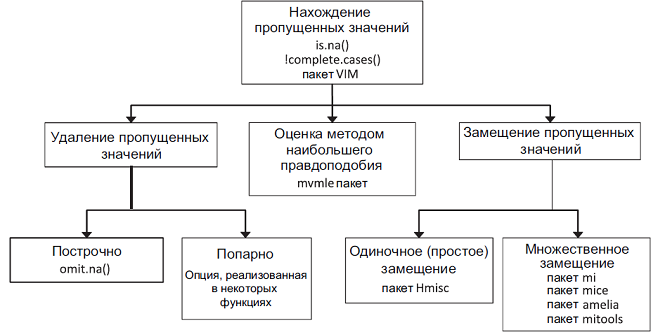


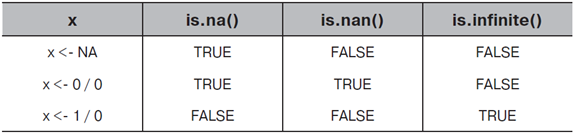


Функцию complete.cases() можно использовать для обнаружения строк в матрице или таблице данных, которые не содержат пропущенных значений. Эта функция возвращает логический вектор со значениями TRUE для всех полных строк и FALSE – для строк с одним и более пропущенными значениями.



In [1]:
install.packages('VIM')
install.packages('mice')
library(VIM)
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ucminf’, ‘iterators’, ‘ordinal’, ‘foreach’, ‘shape’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objec

In [2]:
sleep[complete.cases(sleep),]; sleep[!complete.cases(sleep),]

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2,1.000,6.60,6.3,2.0,8.3,4.5,42.0,3,1,3
5,2547.000,4603.00,2.1,1.8,3.9,69.0,624.0,3,5,4
6,10.550,179.50,9.1,0.7,9.8,27.0,180.0,4,4,4
7,0.023,0.30,15.8,3.9,19.7,19.0,35.0,1,1,1
8,160.000,169.00,5.2,1.0,6.2,30.4,392.0,4,5,4
9,3.300,25.60,10.9,3.6,14.5,28.0,63.0,1,2,1
10,52.160,440.00,8.3,1.4,9.7,50.0,230.0,1,1,1
11,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
12,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5


,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
3,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
4,0.920,5.7,NA,NA,16.5,NA,25,5,2,3
13,0.550,2.4,7.6,2.7,10.3,NA,NA,2,1,2
14,187.100,419.0,NA,NA,3.1,40.0,365,5,5,5
19,1.410,17.5,4.8,1.3,6.1,34.0,NA,1,2,1
20,60.000,81.0,12.0,6.1,18.1,7.0,NA,1,1,1
21,529.000,680.0,NA,0.3,NA,28.0,400,5,5,5
24,207.000,406.0,NA,NA,12.0,39.3,252,1,4,1


In [3]:
sum(is.na(sleep$Dream))

[1] 12

In [4]:
mean(is.na(sleep$Dream))

[1] 0.1935484

In [5]:
mean(!complete.cases(sleep))

[1] 0.3225806

# Исследование структуры пропущенных данных

*Представление пропущенных значений в виде матрицы*

Функция md.pattern() из пакета mice представляет информацию о пропущенных значениях в табличной форме.

,BodyWgt,BrainWgt,Pred,Exp,Danger,Sleep,Span,Gest,Dream,NonD,
42,1,1,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,0,0,2
3,1,1,1,1,1,1,1,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,0,1,0,0,3
1,1,1,1,1,1,1,0,0,1,1,2
2,1,1,1,1,1,0,1,1,1,0,2
2,1,1,1,1,1,0,1,1,0,0,3
,0,0,0,0,0,4,4,4,12,14,38


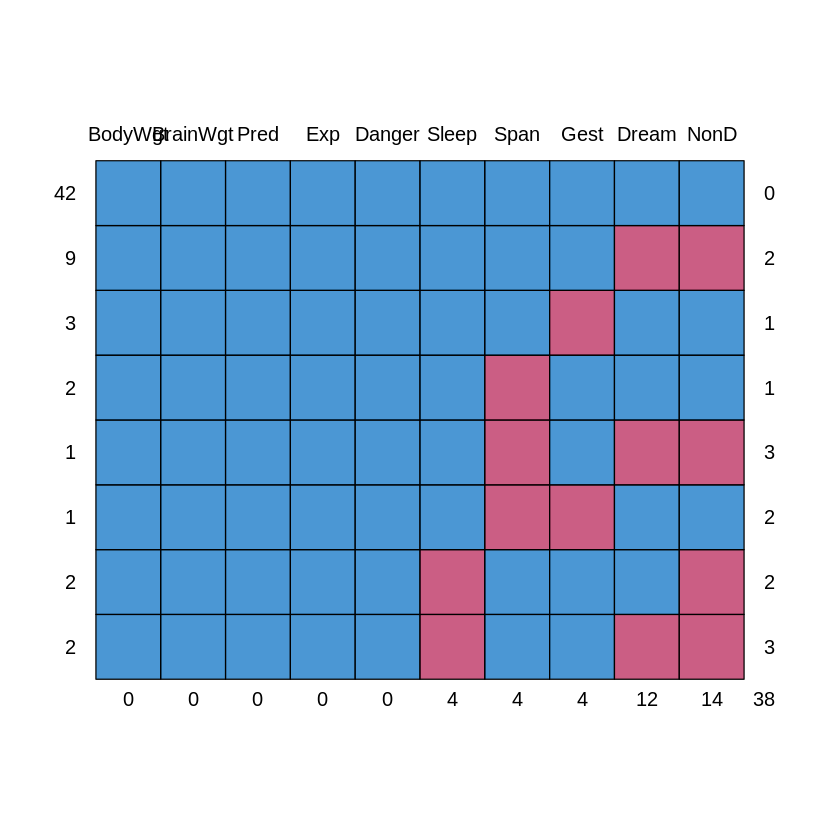

In [8]:
data(sleep, package="VIM")
md.pattern(sleep)

*Визуальное исследование структуры пропущенных данных*

Функция aggr() графически отображает число наблюдений для каждой отдельной переменной и для каждой комбинации переменных.

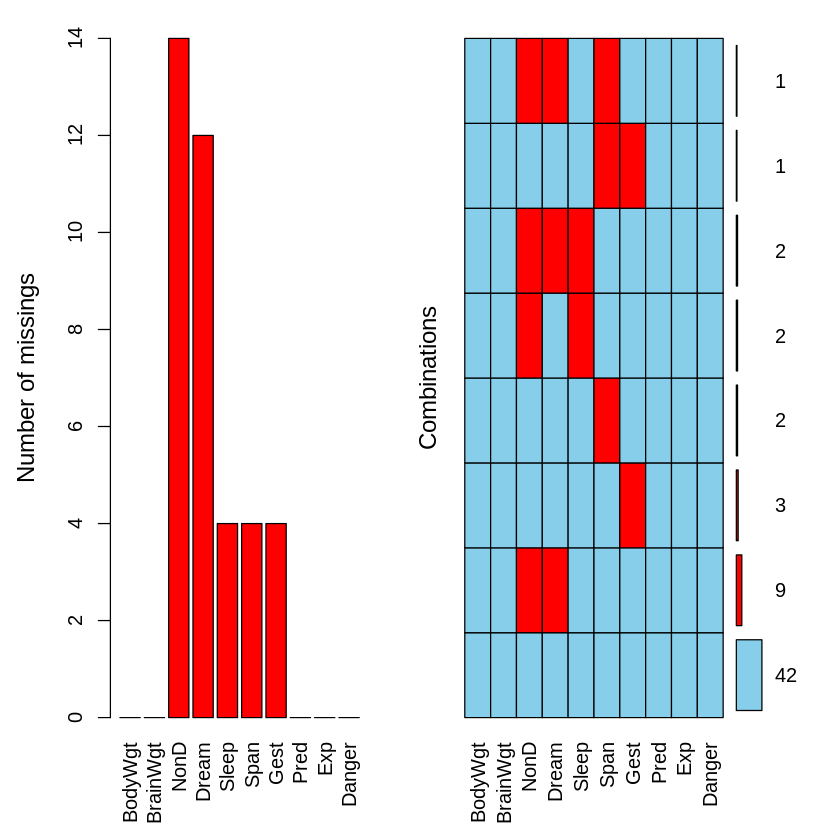

In [9]:
aggr(sleep, prop=FALSE, numbers=TRUE)

Функция matrixplot() графически отображает данные по каждой строке.

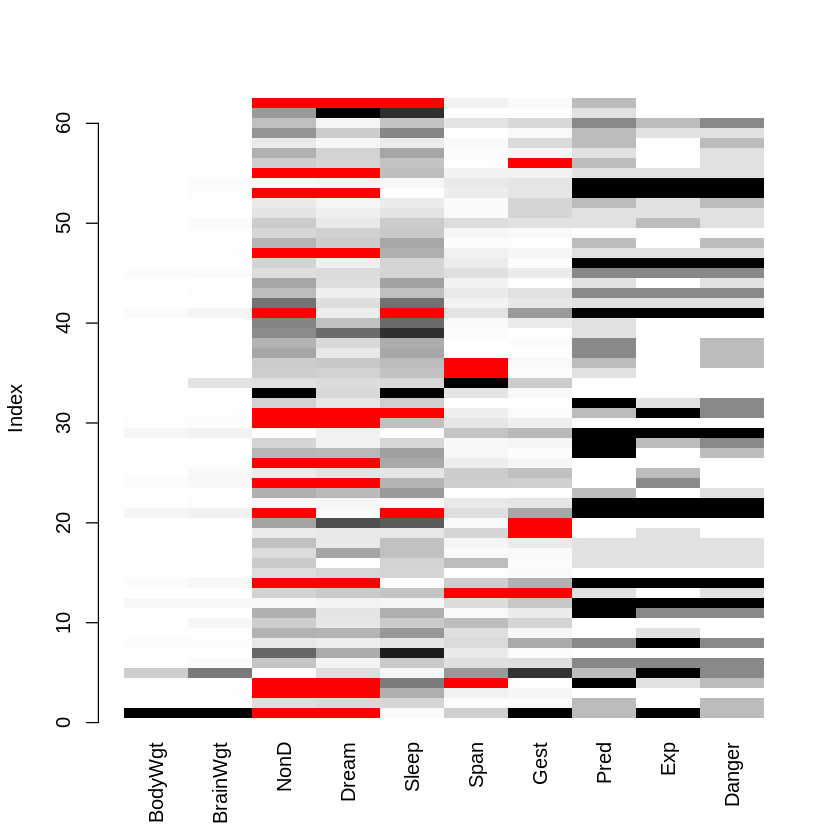

In [10]:
matrixplot(sleep)

Функция marginplot() позволяет получить диаграмму рассеяния для двух переменных, где информация о пропущенных значениях представлена на полях.

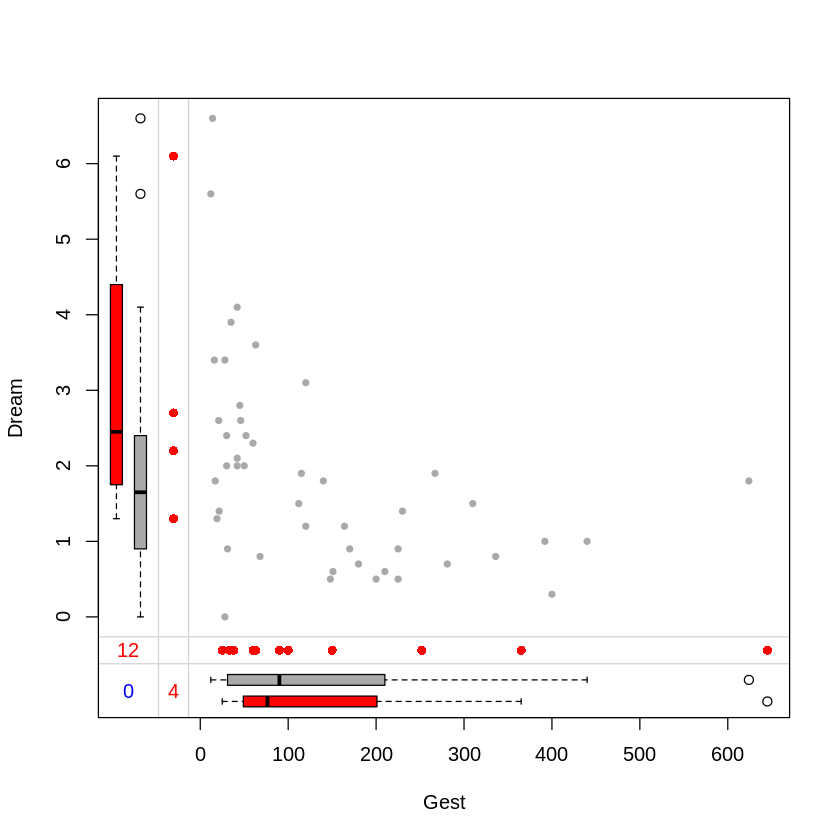

In [11]:
marginplot(sleep[c("Gest","Dream")], pch=c(20), col=c("darkgray", "red", "blue"))

*Использование корреляции для исследования пропущенных значений*

Можно заменить данные условными значениями: 1 – обозначает пропущенное значение, 0 – имеющееся. Полученную таблицу называют матрицей теней (shadow matrix). Вычисление корреляций между этими преобразованными переменными и между ними и исходными перемеными поможет узнать, значения каких переменных имеют тенденцию отсутствовать согласованно, а также выявить связи между отсутствием значений в одной переменной и значениями других переменных.

In [12]:
x <- as.data.frame(abs(is.na(sleep)))

In [13]:
head(sleep, 5)

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
2,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
4,0.920,5.7,NA,NA,16.5,NA,25,5,2,3
5,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4


In [14]:
head(x,5)

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0


In [25]:
cor(sleep, x, use="pairwise.complete.obs")

Warning message in cor(sleep, x, use = "pairwise.complete.obs"):
“the standard deviation is zero”


,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
BodyWgt,NA,NA,0.22682614,0.22259108,0.001684992,-0.05831706,-0.05396818,NA,NA,NA
BrainWgt,NA,NA,0.17945923,0.16321105,0.007859438,-0.07921370,-0.07332961,NA,NA,NA
NonD,NA,NA,NA,NA,NA,-0.04314514,-0.04553485,NA,NA,NA
Dream,NA,NA,-0.18895206,NA,-0.188952059,0.11699247,0.22774685,NA,NA,NA
Sleep,NA,NA,-0.08023157,-0.08023157,NA,0.09638044,0.03976464,NA,NA,NA
Span,NA,NA,0.08336361,0.05981377,0.005238852,NA,-0.06527277,NA,NA,NA
Gest,NA,NA,0.20239201,0.05140232,0.159701523,-0.17495305,NA,NA,NA,NA
Pred,NA,NA,0.04758438,-0.06834378,0.202462711,0.02313860,-0.20101655,NA,NA,NA
Exp,NA,NA,0.24546836,0.12740768,0.260772984,-0.19291879,-0.19291879,NA,NA,NA
Danger,NA,NA,0.06528387,-0.06724755,0.208883617,-0.06666498,-0.20443928,NA,NA,NA


# Выявление источников пропущенных данных и эффекта от них

* Какая доля данных пропущена?
* Сосредоточены ли пропущенные данные в нескольких переменных или они широко распределены по всему набору данных?
* Можно ли их считать случайными?
* Позволяет ли ковариация пропущенных данных друг с другом или с наблюдаемыми данными обнаружить возможный механизм, лежащий в основе пропущенных значений?

Примеры: руководители, уровень образования


# Анализ полных строк (построчное удаление)

Функцию complete.cases() можно использовать для извлечения полных строк матрицы или таблицы данных.



In [26]:
newdata <- mydata[complete.cases(mydata),]

ERROR: Error: object 'mydata' not found


Этого же результата можно добиться при помощи функции na.omit

In [ ]:
newdata <- na.omit(mydata)
options(digits = 1)
cor(na.omit(sleep))

# Метод множественного восстановления пропущенных данных

Метод множественного восстановления пропущенных данных (multiple imputation, MI) – это способ заполнения пропусков при помощи повторного моделирования.

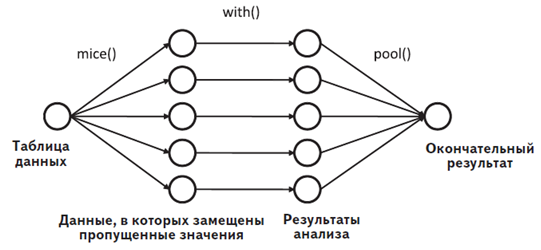

Функция mice() использует исходную таблицу данных с пропущенными значениями, а возвращает объект, содержащий несколько полных наборов данных (пять по умолчанию). Каждый такой полный набор данных получается при восстановлении пропущенных данных исходной таблицы. В алгоритме восстановления данных есть случайная составляющая, поэтому все производные полные наборы данных немного отличаются друг от друга. Затем при помощи функции with() применяется статистическая модель (например, линейная или обобщенная линейная). Функция pool() объединяет результаты, полученные для отдельных производных наборов данных.

https://www.geeksforgeeks.org/mice-package-in-r/

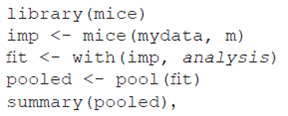

* mydata – это матрица или таблица данных с пропущенными значениями;
* imp – список, содержащий m наборов данных с восстановленными пропущенными значениями вместе с информацией о том, как это восстановление было прове-дено. По умолчанию m = 5;
* analysis – формула, определяющая тип статистического метода, который дол-жен быть применен к каждому из m восстановленных наборов данных. К таким методам относятся lm() – линейная регрессия, glm() – обобщенная линейная регрессия, gam() – обобщенные аддитивные модели и nbrm() – отрицательные биномиальные модели. В формулах внутри скобок зависимая переменная указывается слева от знака ~, а независимые (разделенные знаком +) – справа;
* fit – список, содержащий результаты m отдельных статистических анализов;
* pooled – список, содержащий усредненные результаты этих m отдельных стати-стических анализов.


In [27]:
imp <- mice(sleep, seed= 1234)



 iter imp variable
  1   1  NonD  Dream  Sleep  Span  Gest
  1   2  NonD  Dream  Sleep  Span  Gest
  1   3  NonD  Dream  Sleep  Span  Gest
  1   4  NonD  Dream  Sleep  Span  Gest
  1   5  NonD  Dream  Sleep  Span  Gest
  2   1  NonD  Dream  Sleep  Span  Gest
  2   2  NonD  Dream  Sleep  Span  Gest
  2   3  NonD  Dream  Sleep  Span  Gest
  2   4  NonD  Dream  Sleep  Span  Gest
  2   5  NonD  Dream  Sleep  Span  Gest
  3   1  NonD  Dream  Sleep  Span  Gest
  3   2  NonD  Dream  Sleep  Span  Gest
  3   3  NonD  Dream  Sleep  Span  Gest
  3   4  NonD  Dream  Sleep  Span  Gest
  3   5  NonD  Dream  Sleep  Span  Gest
  4   1  NonD  Dream  Sleep  Span  Gest
  4   2  NonD  Dream  Sleep  Span  Gest
  4   3  NonD  Dream  Sleep  Span  Gest
  4   4  NonD  Dream  Sleep  Span  Gest
  4   5  NonD  Dream  Sleep  Span  Gest
  5   1  NonD  Dream  Sleep  Span  Gest
  5   2  NonD  Dream  Sleep  Span  Gest
  5   3  NonD  Dream  Sleep  Span  Gest
  5   4  NonD  Dream  Sleep  Span  Gest
  5   5  NonD  Dream

Warning message:
“Number of logged events: 4”


In [28]:
fit <- with(imp, lm(Dream ~ Span+Gest))
pooled <- pool(fit)
summary(pooled)

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.532716247,0.252973732,10.0117756,49.59349,1.692620e-13
Span,-0.004126644,0.011823302,-0.3490263,54.71882,7.284091e-01
Gest,-0.004054143,0.001503931,-2.6956971,49.87811,9.550230e-03


In [31]:
str(imp)

List of 22
 $ data           :'data.frame':	62 obs. of  10 variables:
  ..$ BodyWgt : num [1:62] 6654 1 3.38 0.92 2547 ...
  ..$ BrainWgt: num [1:62] 5712 6.6 44.5 5.7 4603 ...
  ..$ NonD    : num [1:62] NA 6.3 NA NA 2.1 9.1 15.8 5.2 10.9 8.3 ...
  ..$ Dream   : num [1:62] NA 2 NA NA 1.8 0.7 3.9 1 3.6 1.4 ...
  ..$ Sleep   : num [1:62] 3.3 8.3 12.5 16.5 3.9 9.8 19.7 6.2 14.5 9.7 ...
  ..$ Span    : num [1:62] 38.6 4.5 14 NA 69 27 19 30.4 28 50 ...
  ..$ Gest    : num [1:62] 645 42 60 25 624 180 35 392 63 230 ...
  ..$ Pred    : int [1:62] 3 3 1 5 3 4 1 4 1 1 ...
  ..$ Exp     : int [1:62] 5 1 1 2 5 4 1 5 2 1 ...
  ..$ Danger  : int [1:62] 3 3 1 3 4 4 1 4 1 1 ...
 $ imp            :List of 10
  ..$ BodyWgt :'data.frame':	0 obs. of  5 variables:
  .. ..$ 1: logi(0) 
  .. ..$ 2: logi(0) 
  .. ..$ 3: logi(0) 
  .. ..$ 4: logi(0) 
  .. ..$ 5: logi(0) 
  ..$ BrainWgt:'data.frame':	0 obs. of  5 variables:
  .. ..$ 1: logi(0) 
  .. ..$ 2: logi(0) 
  .. ..$ 3: logi(0) 
  .. ..$ 4: logi(0) 
  ..

# Попарное удаление

Попарное удаление (pairwise deletion) при работе с неполными наборами данных обычно рассматривается как альтернатива построчному удалению. При попарном удалении наблюдения удаляются только в том случае, если это пропущенные значения в переменных, которые используются в конкретном анализе данных.

In [32]:
cor(sleep, use="pairwise.complete.obs")

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
BodyWgt,1.00000000,0.93416384,-0.3759462,-0.1093833,-0.3071859,0.30245056,0.6511022,0.05949472,0.3382737,0.13358123
BrainWgt,0.93416384,1.00000000,-0.3692177,-0.1051388,-0.3581020,0.50925268,0.7472425,0.03385548,0.3678004,0.14587888
NonD,-0.37594625,-0.36921766,1.0000000,0.5142539,0.9627147,-0.38443179,-0.5947028,-0.31818462,-0.5437566,-0.48385220
Dream,-0.10938331,-0.10513879,0.5142539,1.0000000,0.7270870,-0.29574535,-0.4508987,-0.44747050,-0.5372245,-0.57933653
Sleep,-0.30718591,-0.35810203,0.9627147,0.7270870,1.0000000,-0.41020239,-0.6313262,-0.39583497,-0.6422845,-0.58774241
Span,0.30245056,0.50925268,-0.3844318,-0.2957453,-0.4102024,1.00000000,0.6148488,-0.10254416,0.3603522,0.06177846
Gest,0.65110218,0.74724248,-0.5947028,-0.4508987,-0.6313262,0.61484879,1.0000000,0.20050426,0.6382790,0.37861701
Pred,0.05949472,0.03385548,-0.3181846,-0.4474705,-0.3958350,-0.10254416,0.2005043,1.00000000,0.6182460,0.91604245
Exp,0.33827367,0.36780037,-0.5437566,-0.5372245,-0.6422845,0.36035221,0.6382790,0.61824597,1.0000000,0.78720311
Danger,0.13358123,0.14587888,-0.4838522,-0.5793365,-0.5877424,0.06177846,0.3786170,0.91604245,0.7872031,1.00000000
